## DATA OVERVIEW

In [1]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [2]:
train_df.shape

(750000, 12)

In [3]:
test_df.shape

(250000, 11)

In [4]:
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [5]:
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


### EDA(Exploratory Data Analysis)

#### MISSING VALUES

In [8]:
train_missing = train_df.isnull().sum()
test_missing = test_df.isnull().sum()

missing_df = pd.DataFrame({
    "Train Missing": train_missing,
    "Test Missing": test_missing
})

missing_df["Train %"] = (missing_df["Train Missing"] / len(train_df) * 100).round(2)
missing_df["Train %"] = (missing_df["Test Missing"] / len(test_df) * 100).round(2)

missing_df

,Train Missing,Test Missing,Train %
Episode_Length_minutes,87093,28736.0,11.49
Episode_Sentiment,0,0.0,0.00
Episode_Title,0,0.0,0.00
Genre,0,0.0,0.00
Guest_Popularity_percentage,146030,48832.0,19.53
Host_Popularity_percentage,0,0.0,0.00
Listening_Time_minutes,0,NaN,NaN
Number_of_Ads,1,0.0,0.00
Podcast_Name,0,0.0,0.00
Publication_Day,0,0.0,0.00


#### Unique Values counts for categorical columns

In [9]:
categorical_cols = train_df.select_dtypes(include = ["object"]).columns

for col in categorical_cols:
    print(f"{col} - {train_df[col].nunique()} unique values")
    print(train_df[col].unique())
    print("-" * 50)

Podcast_Name - 48 unique values
['Mystery Matters' 'Joke Junction' 'Study Sessions' 'Digital Digest'
 'Mind & Body' 'Fitness First' 'Criminal Minds' 'News Roundup'
 'Daily Digest' 'Music Matters' 'Sports Central' 'Melody Mix' 'Game Day'
 'Gadget Geek' 'Global News' 'Tech Talks' 'Sport Spot' 'Funny Folks'
 'Sports Weekly' 'Business Briefs' 'Tech Trends' 'Innovators'
 'Health Hour' 'Comedy Corner' 'Sound Waves' 'Brain Boost'
 "Athlete's Arena" 'Wellness Wave' 'Style Guide' 'World Watch' 'Humor Hub'
 'Money Matters' 'Healthy Living' 'Home & Living' 'Educational Nuggets'
 'Market Masters' 'Learning Lab' 'Lifestyle Lounge' 'Crime Chronicles'
 'Detective Diaries' 'Life Lessons' 'Current Affairs' 'Finance Focus'
 'Laugh Line' 'True Crime Stories' 'Business Insights' 'Fashion Forward'
 'Tune Time']
--------------------------------------------------
Episode_Title - 100 unique values
['Episode 98' 'Episode 26' 'Episode 16' 'Episode 45' 'Episode 86'
 'Episode 19' 'Episode 47' 'Episode 44' 'Episod

#### Target Variable Analysis

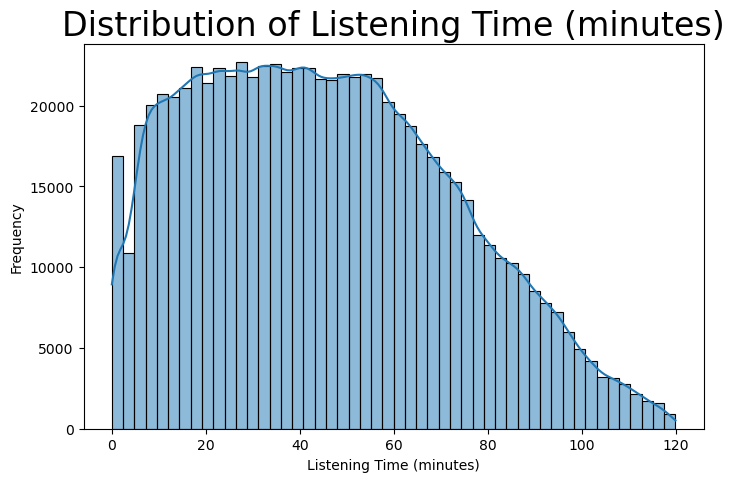

count    750000.000000
mean         45.437406
std          27.138306
min           0.000000
25%          23.178350
50%          43.379460
75%          64.811580
max         119.970000
Name: Listening_Time_minutes, dtype: float64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8 , 5))
sns.histplot(train_df["Listening_Time_minutes"], kde = True , bins = 50)
plt.title("Distribution of Listening Time (minutes)" , fontsize = 24)
plt.xlabel("Listening Time (minutes)")
plt.ylabel("Frequency")
plt.show()

train_df["Listening_Time_minutes"].describe()

#### Categorical Feature Exploration

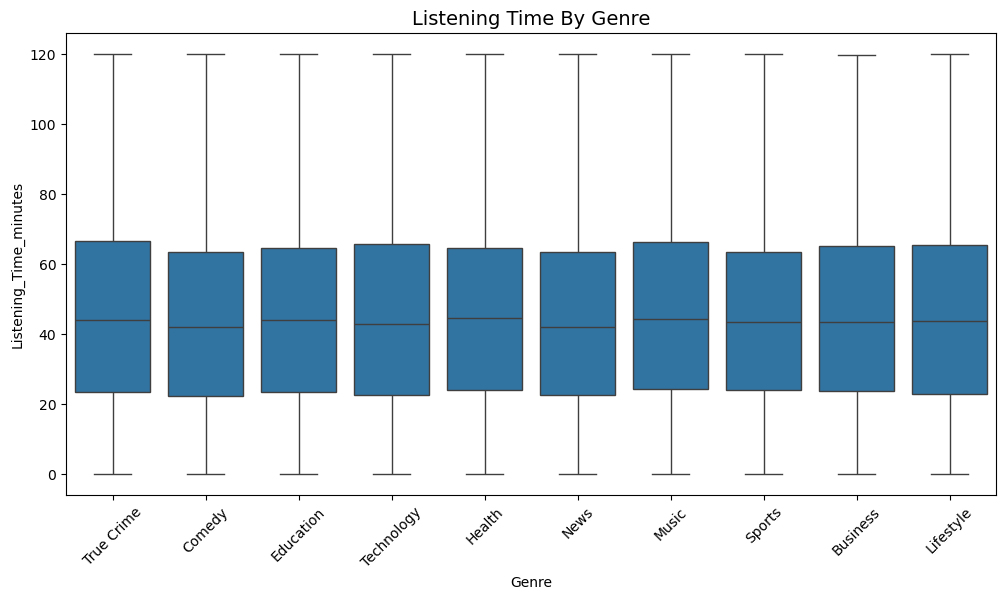

Genre
Music         46.578394
True Crime    46.042507
Health        45.741413
Education     45.736640
Technology    45.634749
Business      45.538151
Lifestyle     45.523117
Sports        44.935722
Comedy        44.426441
News          44.406144
Name: Listening_Time_minutes, dtype: float64

In [11]:
plt.figure(figsize = (12 , 6))
sns.boxplot(data = train_df , x = "Genre" , y = "Listening_Time_minutes")
plt.xticks(rotation = 45)
plt.title("Listening Time By Genre" , fontsize = 14)
plt.show()

train_df.groupby("Genre")["Listening_Time_minutes"].mean().sort_values(ascending = False)

#### Listening Time by Publication Day

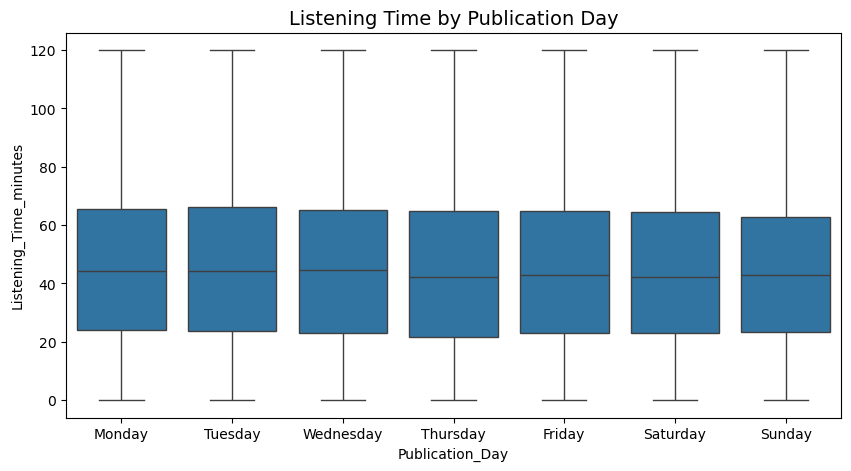

Publication_Day
Tuesday      46.131411
Monday       45.969630
Wednesday    45.807177
Saturday     45.326775
Friday       45.206591
Thursday     44.869706
Sunday       44.817398
Name: Listening_Time_minutes, dtype: float64

In [12]:
plt.figure(figsize = (10 , 5))
sns.boxplot(data = train_df  , x = "Publication_Day"  , y = "Listening_Time_minutes" , order = ["Monday" , "Tuesday" , "Wednesday" , "Thursday" , "Friday" , "Saturday" , "Sunday"])
plt.title("Listening Time by Publication Day" , fontsize = 14)
plt.show()

train_df.groupby("Publication_Day")["Listening_Time_minutes"].mean().sort_values(ascending = False)

#### Listening Time By Publication Time

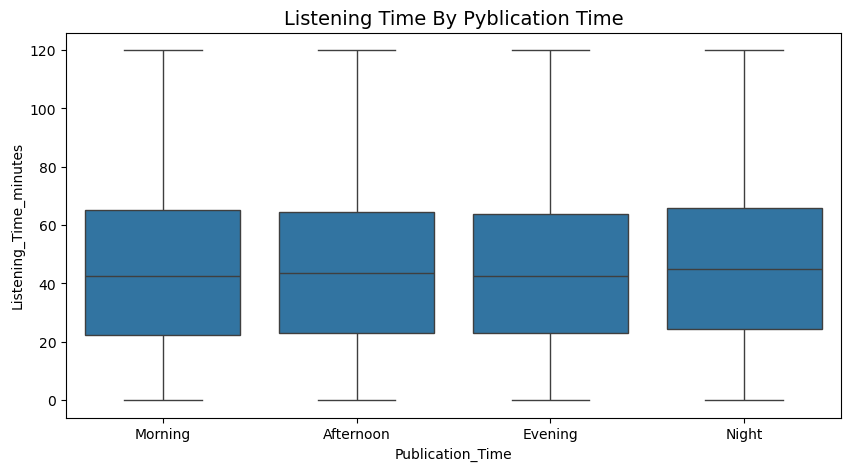

Publication_Time
Night        46.456655
Afternoon    45.525603
Morning      44.964415
Evening      44.761567
Name: Listening_Time_minutes, dtype: float64

In [13]:
plt.figure(figsize = (10 , 5))
sns.boxplot(data = train_df , x = "Publication_Time" , y = "Listening_Time_minutes" , order = ["Morning" , "Afternoon" , "Evening" , "Night"])
plt.title("Listening Time By Pyblication Time" , fontsize = 14)
plt.show()

train_df.groupby("Publication_Time")["Listening_Time_minutes"].mean().sort_values(ascending = False)

#### Correlation Between Numerical Features 

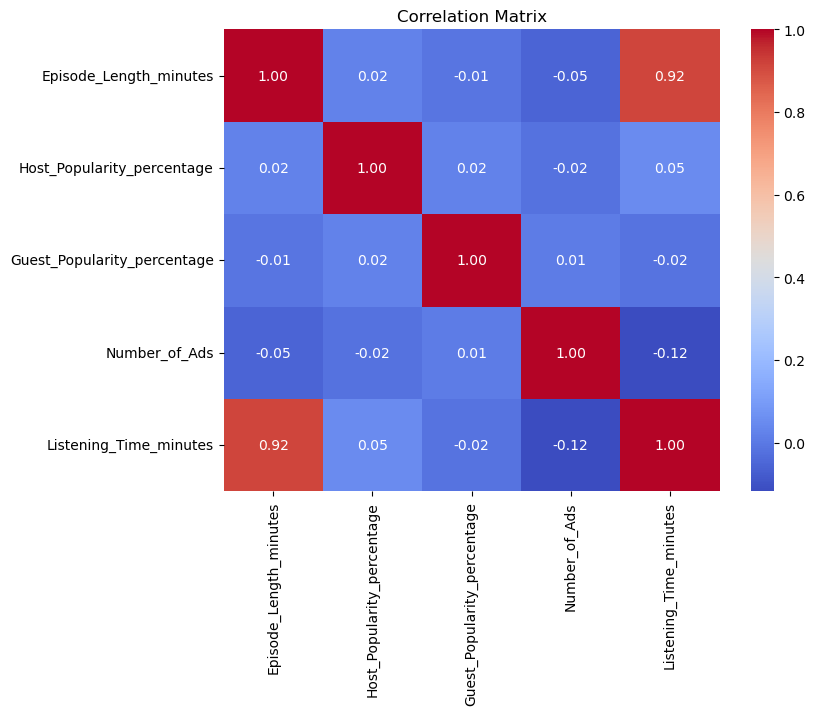

Listening_Time_minutes         1.000000
Episode_Length_minutes         0.916749
Host_Popularity_percentage     0.050870
Guest_Popularity_percentage   -0.016014
Number_of_Ads                 -0.118337
Name: Listening_Time_minutes, dtype: float64

In [14]:
numerical_cols = ["Episode_Length_minutes" , "Host_Popularity_percentage" , "Guest_Popularity_percentage" , "Number_of_Ads" , "Listening_Time_minutes"]
corr_matrix = train_df[numerical_cols].corr()

plt.figure(figsize = (8 , 6))
sns.heatmap(corr_matrix , annot = True , cmap = "coolwarm" , fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

train_df[numerical_cols].corr()["Listening_Time_minutes"].sort_values(ascending = False)

### Outlier Detection

In [15]:
numerical_cols = train_df.select_dtypes(include = ["float64" , "int64"]).columns
numerical_cols

Index(['id', 'Episode_Length_minutes', 'Host_Popularity_percentage',
       'Guest_Popularity_percentage', 'Number_of_Ads',
       'Listening_Time_minutes'],
      dtype='object')

In [16]:
Q1 = train_df["Episode_Length_minutes"].quantile(0.25)
Q3 = train_df["Episode_Length_minutes"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_episode_length = train_df[
    (train_df["Episode_Length_minutes"] < lower_bound) |
    (train_df["Episode_Length_minutes"] > upper_bound)
]
len(outliers_episode_length)

1

In [17]:
Q1 = train_df["Host_Popularity_percentage"].quantile(0.25)
Q3 = train_df["Host_Popularity_percentage"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_host_popularity = train_df[
    (train_df["Host_Popularity_percentage"] < lower_bound) |
    (train_df["Host_Popularity_percentage"] > upper_bound)
]
len(outliers_host_popularity)

0

In [18]:
Q1 = train_df["Number_of_Ads"].quantile(0.25)
Q3 = train_df["Number_of_Ads"].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_ads = train_df[
    (train_df["Number_of_Ads"] < lower_bound) |
    (train_df["Number_of_Ads"] > upper_bound)
]
len(outliers_ads)

9

# Data Preprocessing

#### Handle Categorical Variables

In [19]:
import pandas as pd

df_encoded = pd.get_dummies(train_df , columns = ["Publication_Day" , "Publication_Time"] , drop_first = False)

print("Shape before encoding:" , train_df.shape)
print("Shape after encoding:" , df_encoded.shape)

df_encoded.head()

Shape before encoding: (750000, 12)
Shape after encoding: (750000, 21)


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,...,Publication_Day_Monday,Publication_Day_Saturday,Publication_Day_Sunday,Publication_Day_Thursday,Publication_Day_Tuesday,Publication_Day_Wednesday,Publication_Time_Afternoon,Publication_Time_Evening,Publication_Time_Morning,Publication_Time_Night
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,NaN,0.0,Positive,31.41998,...,False,False,False,True,False,False,False,False,False,True
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,75.95,2.0,Negative,88.01241,...,False,True,False,False,False,False,True,False,False,False
2,2,Study Sessions,Episode 16,73.90,Education,69.97,8.97,0.0,Negative,44.92531,...,False,False,False,False,True,False,False,True,False,False
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,78.70,2.0,Positive,46.27824,...,True,False,False,False,False,False,False,False,True,False
4,4,Mind & Body,Episode 86,110.51,Health,80.07,58.68,3.0,Neutral,75.61031,...,True,False,False,False,False,False,True,False,False,False


#### Handle numerical values (Missing Values)

In [20]:
from sklearn.impute import SimpleImputer

num_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 
            'Guest_Popularity_percentage', 'Number_of_Ads']

imputer = SimpleImputer(strategy = "median")
df_encoded[num_cols] = imputer.fit_transform(df_encoded[num_cols])

df_encoded[num_cols].isnull().sum()

Episode_Length_minutes         0
Host_Popularity_percentage     0
Guest_Popularity_percentage    0
Number_of_Ads                  0
dtype: int64

### Training Linear Regression Models

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
import numpy as np
import pandas as pd

categorical_cols = [col for col in ['Publication_Day', 'Publication_Time', 'Genre', 'Episode_Sentiment'] if col in df_encoded.columns]
df_encoded = pd.get_dummies(
    df_encoded,
    columns = categorical_cols,
    drop_first = True
)

freq_encoding = df_encoded["Podcast_Name"].value_counts() / len(df_encoded)
df_encoded["Podcast_Name_FE"] = df_encoded["Podcast_Name"].map(freq_encoding)

df_encoded = df_encoded.drop(columns = ["Episode_Title" , "Podcast_Name"])

numeric_cols = ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Guest_Popularity_percentage', 'Number_of_Ads']
df_encoded[numeric_cols] = df_encoded[numeric_cols].fillna(df_encoded[numeric_cols].median())

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


x = df_encoded.drop(columns = ["Listening_Time_minutes" , "id"])
y = df_encoded["Listening_Time_minutes"]

print("Feature Shape:" , x.shape)
print("Target Shape:" , y.shape)


x_train , x_val , y_train , y_val = train_test_split(x , y , test_size = 0.2 , random_state = 42)

print("Training set Shape;" , x_train.shape , y_train.shape)
print("Validation set Shape;" , x_val.shape , y_val.shape)


lr_model = LinearRegression()
lr_model.fit(x_train , y_train)

y_pred = lr_model.predict(x_val)

mae = mean_absolute_error(y_val , y_pred)
mse = mean_squared_error(y_val , y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val , y_pred)

print("Linear Regression Performance on Validation Set:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Feature Shape: (750000, 27)
Target Shape: (750000,)
Training set Shape; (600000, 27) (600000,)
Validation set Shape; (150000, 27) (150000,)
Linear Regression Performance on Validation Set:
MAE: 9.772
MSE: 178.121
RMSE: 13.346
R² Score: 0.758


## Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
import numpy as np

rf_model = RandomForestRegressor(
    n_estimators = 100,
    max_depth = None,
    random_state = 42,
    n_jobs = -1
)

rf_model.fit(x_train , y_train)

y_pred_rf = rf_model.predict(x_val)

mae_rf = mean_absolute_error(y_val , y_pred_rf)
mse_rf = mean_squared_error(y_val , y_pred_rf)
rmse_rf = np.sqrt(mse)
r2_rf = r2_score(y_val , y_pred_rf)

print("Random Forest Performance on Validation Set:")
print(f"MAE: {mae_rf:.3f}")
print(f"MSE: {mse_rf:.3f}")
print(f"RMSE: {rmse_rf:.3f}")
print(f"R² Score: {r2_rf:.3f}")

Random Forest Performance on Validation Set:
MAE: 9.023
MSE: 161.677
RMSE: 13.346
R² Score: 0.780


## Hyperparameter Tuning

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
import numpy as np

rf_model = RandomForestRegressor(random_state = 42 , n_jobs = -1)

param_dist = {
    "n_estimators": [100 , 200],
    "max_depth": [None , 10 , 20],
    "min_samples_split": [2 , 5],
    "min_samples_leaf": [1 , 2],
    "max_features": ["sqrt" , "log2"]
}

random_search = RandomizedSearchCV(
    estimator = rf_model,
    param_distributions = param_dist,
    n_iter = 10,
    cv = 2,
    verbose = 2,
    random_state = 42,
    n_jobs = -1,
    scoring = "r2"
)

x_train_sample = x_train.sample(50000 , random_state = 42)
y_train_sample = y_train.loc[x_train_sample.index]

random_search.fit(x_train , y_train)

print("Best Hyperparameters:" , random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred_rf = best_rf.predict(x_val)

mae = mean_absolute_error(y_val , y_pred_rf)
mse = mean_squared_error(y_val , y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_val , y_pred_rf)

print("Tuned Random Forest Performance on Validation Set:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Tuned Random Forest Performance on Validation Set:
MAE: 9.372
MSE: 166.834
RMSE: 12.916
R² Score: 0.773


### XGBoost

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from xgboost import XGBRegressor

x_train , x_val , y_train , y_val = train_test_split(x , y , test_size = 0.2 , random_state = 42)

xgb_base = XGBRegressor(random_state = 42 , verbosity = 0 , n_jobs = -1)
xgb_base.fit(x_train , y_train)
y_pred_base = xgb_base.predict(x_val)

print("Baseline XGBoost Performance:")
print(f"MAE:" , round(mean_absolute_error(y_val , y_pred_base) , 3))
print(f"MSE:" , round(mean_squared_error(y_val , y_pred_base) , 3))
print(f"RMSE:" , round(np.sqrt(mean_squared_error(y_val , y_pred_base)) , 3))
print(f"R² Score:" , round(r2_score(y_val , y_pred_base) , 3))

param_dist = {
    "n_estimators": [100 , 200 , 300],
    "max_depth": [3 , 5 , 7 , 10],
    "learning_rate": [0.01 , 0.05 , 0.1],
    "subsample": [0.6 , 0.8 , 1],
    "colsample_bytree": [0.6 , 0.8 , 1.0],
    "min_child_weight": [1 , 3 , 5]
}

xgb_model = XGBRegressor(objective = "reg:squarederror" , random_state = 42 , n_jobs = -1 , verbosity = 0)

random_search = RandomizedSearchCV(
    estimator = xgb_model,
    param_distributions = param_dist,
    n_iter = 10,
    cv = 2,
    verbose = 1,
    random_state = 42,
    n_jobs = -1,
    scoring = "r2"
)

random_search.fit(x_train , y_train)

print("Best Hyperparameters:" , random_search.best_params_)

best_xgb = random_search.best_estimator_
y_pred_tuned = best_xgb.predict(x_val)

print("\nTuned XGBoost Performance on validation set:")
print("MAE:" , round(mean_absolute_error(y_val , y_pred_tuned) , 3))
print("MSE:" , round(mean_squared_error(y_val , y_pred_tuned) , 3))
print("RMSE:" , round(np.sqrt(mean_squared_error(y_val , y_pred_tuned)) , 3))
print("R² Score:" , round(r2_score(y_val , y_pred_tuned) , 3))

Baseline XGBoost Performance:
MAE: 9.467
MSE: 169.694
RMSE: 13.027
R² Score: 0.769
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

Tuned XGBoost Performance on validation set:
MAE: 9.386
MSE: 167.234
RMSE: 12.932
R² Score: 0.773


### Saving

In [45]:
import joblib

joblib.dump(best_xgb , "xgboost_tuned_model.pkl")
print("Model Saved as xgboost_tuned_model.pkl")

Model Saved as xgboost_tuned_model.pkl


In [48]:
predictions_df = pd.DataFrame({
    "Actual": y_val.values,
    "Predicted": y_pred
})
predictions_df.to_csv("xgboost_predictions.csv" , index = False)
print("Prediction Saved to xgboost_predictions.csv")

Prediction Saved to xgboost_predictions.csv
